In [1]:
sigma_tcsm = 2067 #position in microns for one sigma
centre_tcsm = -443

jaw_positions = [round(5.7*sigma_tcsm+centre_tcsm), round(-5.7*sigma_tcsm+centre_tcsm)] #at5.7 sigma beam

coast 5 too aggressive, after 9 steps losses triggered blms and we dumped

In [ ]:
import numpy as np
from pathlib import Path
import time
import matplotlib.pyplot as plt
start_time = time.time()

import xobjects as xo
import xtrack as xt
import xpart as xp
import xobjects as xo
import xcoll as xc

import apertls
from matplotlib.colors import LogNorm

In [3]:
line = xt.Line.from_json('../injection_lines/sps_with_aperture_inj_q20_beam_sagitta.json')

Loading line from dict:   0%|          | 0/36381 [00:00<?, ?it/s]

Done loading line from dict.           


In [4]:
env = line.env

mdh.11207

mdh.11407

mdh.11607

In [14]:
line['adh.11207'] = 1e-6
line['adh.11407'] = 1e-6
line['adh.11607'] = 1e-6

In [10]:
for name in line.element_names:
    if 'tidp' in name:
        print(name)

tidp.11434..0
tidp.11434.a_aper
tidp.11434..1
tidp.11434.b_aper
tidp.11434..2


In [17]:
line.element_names[4458-10]

'vttv.11205.z_aper'

In [19]:
line.element_names[5934+10]

'drift_128..0'

In [18]:
line.element_names.index('mdh.11607')

5934

In [22]:
tw_bef = line.twiss()

In [29]:
tw_bef.rows['tidp.11434..1'].betx[0]

np.float64(94.57911640437035)

In [38]:
# opt = line.match(
#     #start='mdh.11207', end='mdh.11607',
#     #betx=tw_bef.rows['tidp.11434..1'].betx[0], bety=tw_bef.rows['tidp.11434..1'].bety[0], x=tw_bef.rows['tidp.11434..1'].x[0], # <-- conditions at start
#     vary=xt.VaryList(['adh.11207', 'adh.11407', 'adh.11607'],
#                     step=1e-10, limits=[-1e-3, 1e-3]),
#     targets = [
#         #xt.TargetSet(x=-6.5e-3, at='tidp.11434..0'),
#         xt.TargetSet(x=-6.5e-3, at='tidp.11434..1'),
#         #xt.TargetSet(x=-6.5e-3, at='tidp.11434..2')
#     ])

opt = line.match(
    solve=False, # <--
    method='6d',
    vary=[
        xt.VaryList(['adh.11207', 'adh.11407', 'adh.11607'], step=1e-8, tag='correctors',)
    ],
    targets = [
        xt.TargetSet(x=-6.5e-3, at='tidp.11434..1')
    ])

In [39]:
tw = line.twiss()

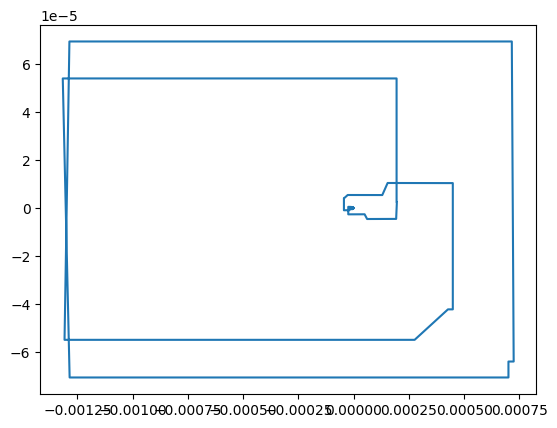

In [40]:
plt.figure()
plt.plot(tw.x, tw.px)